In [2]:
# Preprocessing Block
import sys
import pickle

f = open("reviews.txt")
raw_reviews = f.readlines()
f.close()

f = open("labels.txt")
raw_labels = f.readlines()
f.close()

tokens = list(map(lambda x: set(x.split(" ")), raw_reviews))

vocab = set()
for sent in tokens:
    for word in sent:
        if(len(word) > 0):
            vocab.add(word)
vocab = list(vocab) # why do this list() conversion?

word2index = {}
for i,word in enumerate(vocab):
    word2index[word] = i
    # word2index will contain of the index of the word where it last occurred.
    # if(word in word2index):
    #     print('word is a duplicate:', word)
    #     print('index', i)

input_dataset = list() # what is the purpose of this data structure?
for sent in tokens:
    sent_indices = list()
    for word in sent:
        try:
            sent_indices.append(word2index[word])
        except:
            ""
    input_dataset.append(list(set(sent_indices)))

target_dataset = list()
for label in raw_labels:
    if label == 'positive\n':
        target_dataset.append(1)
    else:
        target_dataset.append(0)

In [ ]:
# Vector Functions

def elementwise_multiplication(vec_a, vec_b):
    res = []
    for i in range(len(vec_a)):
        res[i] = vec_a[i] * vec_b[i]
    return res

def elementwise_addition(vec_a, vec_b):
    res = []
    for i in range(len(vec_a)):
        res[i] = vec_a[i] + vec_b[i]
    return res

def vector_sum(vec_a):
    return sum(vec_a)

def vector_average(vec_a):
    return vector_sum(vec_a)/len(vec_a)

def dot_product(mat_a, mat_b):
    # use two of the above methods to perform a dot product
    # only for two dimensional matrices
    for i in range(len(mat_a)):
        for j in range(len(mat_b)):
            
            
def test_dot_product():
    mat_a = [[0,1,2]]
    mat_b = [[0],[0],[1]]
            

In [7]:
# Converting a basic neural network from using lists and numbers to using numpy
import numpy as np

def w_sum_og(a,b):
    assert len(a) == len(b)
    res = 0
    for i in range(len(a)):
        res += a[i] * b[i]
    return res
weights_og = [0.2, 0.1, 0]

def neural_network_og(input_elements, weights):
    pred = w_sum_og(input_elements, weights)
    return pred
toes_og = [8.5, 9, 9.9, 9.0]
wlrec_og = [0.65, 0.8, 0.8, 0.9]
nfans_og = [1.2, 1.3, 0.5, 1.0]

inputs_og = [toes_og[0], wlrec_og[0], nfans_og[0]] # records for first game
pred_og = neural_network_og(inputs_og, weights_og)
print('pred_og from og implementation', pred_og)

# Numpy version of above code
weights = np.array([0.2, 0.1, 0])
def neural_network(inputs, weights):
    pred  = inputs.dot(weights)
    return pred

toes = np.array([8.5, 9, 9.9, 9.0])
wlrec = np.array([0.65, 0.8, 0.8, 0.9])
nfans = np.array([1.2, 1.3, 0.5, 1.0])

inputs = np.array([toes_og[0], wlrec_og[0], nfans_og[0]]) # records for first game
pred = neural_network(inputs, weights)
print('pred from np implementation', pred)

pred_og from og implementation 1.7650000000000001
pred from np implementation 1.7650000000000001


In [21]:
# Breaking Gradient Descent
weight = 0.5
goal_pred = 0.8
# input = 0.8
input = 2
print('goal_pred',goal_pred)
print('input',input)
for iteration in range(20):
    pred = input * weight
    error = (pred - goal_pred) ** 2
    delta = pred - goal_pred
    weight_delta = input * delta
    print('pred',pred)
    print('delta:'+str(delta))
    print('Before weight update: '+str(weight))
    weight = weight - weight_delta
    print('After weight update: '+str(weight))
    print(str(iteration+1) + ". Error:" + str(error) + " Prediction:" + str(pred))
# Above code broke when we set input to 2 and still try to predict 0.8 why??
# because the large input caused huge overcorrections to the weight

goal_pred 0.8
input 2
pred 1.0
delta:0.19999999999999996
Before weight update: 0.5
After weight update: 0.10000000000000009
1. Error:0.03999999999999998 Prediction:1.0
pred 0.20000000000000018
delta:-0.5999999999999999
Before weight update: 0.10000000000000009
After weight update: 1.2999999999999998
2. Error:0.3599999999999998 Prediction:0.20000000000000018
pred 2.5999999999999996
delta:1.7999999999999996
Before weight update: 1.2999999999999998
After weight update: -2.2999999999999994
3. Error:3.2399999999999984 Prediction:2.5999999999999996
pred -4.599999999999999
delta:-5.399999999999999
Before weight update: -2.2999999999999994
After weight update: 8.499999999999998
4. Error:29.159999999999986 Prediction:-4.599999999999999
pred 16.999999999999996
delta:16.199999999999996
Before weight update: 8.499999999999998
After weight update: -23.89999999999999
5. Error:262.4399999999999 Prediction:16.999999999999996
pred -47.79999999999998
delta:-48.59999999999998
Before weight update: -23.89

In [24]:
# Solution add learning rate (alpha) to the weight updates
weight = 0.5
goal_pred = 0.8
input = 2
alpha = 0.1
for iteration in range(20):
    pred = input * weight
    error = (pred - goal_pred) ** 2
    delta = pred - goal_pred
    weight_delta = input * delta
    weight = weight - (weight_delta * alpha)
    print(str(iteration+1) + ". Error:" + str(error) + " Prediction:" + str(pred))

1. Error:0.03999999999999998 Prediction:1.0
2. Error:0.0144 Prediction:0.92
3. Error:0.005183999999999993 Prediction:0.872
4. Error:0.0018662400000000014 Prediction:0.8432000000000001
5. Error:0.0006718464000000028 Prediction:0.8259200000000001
6. Error:0.00024186470400000033 Prediction:0.815552
7. Error:8.70712934399997e-05 Prediction:0.8093312
8. Error:3.134566563839939e-05 Prediction:0.80559872
9. Error:1.1284439629823931e-05 Prediction:0.803359232
10. Error:4.062398266736526e-06 Prediction:0.8020155392
11. Error:1.4624633760252567e-06 Prediction:0.8012093235200001
12. Error:5.264868153690924e-07 Prediction:0.8007255941120001
13. Error:1.8953525353291194e-07 Prediction:0.8004353564672001
14. Error:6.82326912718715e-08 Prediction:0.8002612138803201
15. Error:2.456376885786678e-08 Prediction:0.8001567283281921
16. Error:8.842956788836216e-09 Prediction:0.8000940369969153
17. Error:3.1834644439835434e-09 Prediction:0.8000564221981492
18. Error:1.1460471998340758e-09 Prediction:0.800033

In [27]:
# Do the previous solution from memory
weight = 0.9
goal_pred = 0.8
input = 2
alpha = 0.1
for iteration in range(20):
    pred = input * weight
    error = (pred-goal_pred) ** 2 # Mean squared loss
    # Why mean squared error and not absolute value?
    delta = pred-goal_pred # What is delta exactly?
    # Delta is the raw error
    weight_delta = input * delta
    weight -= weight_delta*alpha # We subtract the derivative because going in th opposite direction of the sign of the derivative leads to the minimum loss
    print('Iteration:'+str(iteration) + ' error: '+str(error) + " prediction:"+str(pred))

Iteration:0 error: 1.0 prediction:1.8
Iteration:1 error: 0.3599999999999998 prediction:1.4
Iteration:2 error: 0.1295999999999999 prediction:1.16
Iteration:3 error: 0.04665599999999999 prediction:1.016
Iteration:4 error: 0.016796159999999984 prediction:0.9296
Iteration:5 error: 0.0060466175999999905 prediction:0.87776
Iteration:6 error: 0.0021767823359999925 prediction:0.846656
Iteration:7 error: 0.0007836416409599973 prediction:0.8279936
Iteration:8 error: 0.00028211099074559827 prediction:0.81679616
Iteration:9 error: 0.00010155995666841538 prediction:0.810077696
Iteration:10 error: 3.656158440063007e-05 prediction:0.8060466176000001
Iteration:11 error: 1.3162170384226505e-05 prediction:0.80362797056
Iteration:12 error: 4.738381338321348e-06 prediction:0.802176782336
Iteration:13 error: 1.7058172817956273e-06 prediction:0.8013060694016
Iteration:14 error: 6.140942214464955e-07 prediction:0.80078364164096
Iteration:15 error: 2.2107391972069662e-07 prediction:0.800470184984576
Iteration

error_output [0.01959999999999997, 0.0013135188062500048, 8.802712522307997e-05, 5.899249206154892e-06, 3.953456517877471e-07, 2.6494589213863218e-08, 1.7755684283936714e-09, 1.189919654307157e-10, 7.974397162950331e-12, 5.344143185591192e-13, 3.581445191241023e-14, 2.4001508278382324e-15, 1.6084914741122043e-16, 1.0779508973312966e-17, 7.22402356619552e-19, 4.8412758651194115e-20, 3.244453368025973e-21, 2.1742762040739114e-22, 1.4570777672628814e-23, 9.7611924011413e-25, 6.548808923377916e-26, 4.40780961172898e-27, 2.8853820203622915e-28, 2.0719924713695638e-29, 1.232595164407831e-30, 4.930380657631324e-32, 4.930380657631324e-32, 0.0, 0.0, 0.0]
weight_output1 [0.1, 0.1119, 0.11498061250000001, 0.1157781060609375, 0.11598455720652519, 0.1160380022468392, 0.11605183783165049, 0.11605541951866852, 0.1160563467278953, 0.1160565867591839, 0.11605664889728373, 0.11605666498328432, 0.11605666914754773, 0.11605667022557142, 0.1160566705046448, 0.11605667057688991, 0.11605667059559238, 0.11605

<IPython.core.display.Javascript object>


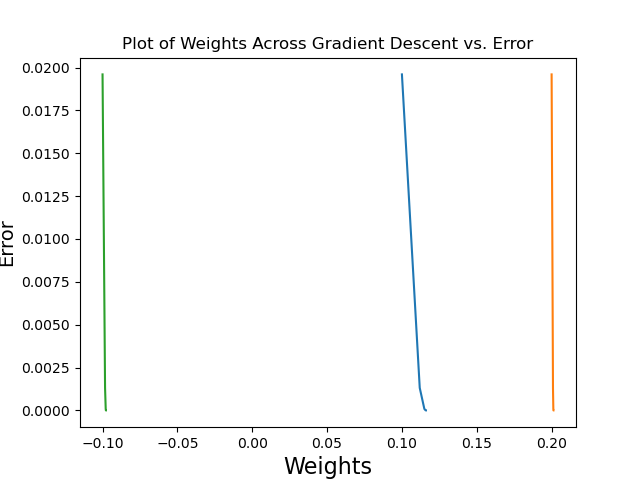

In [43]:
import matplotlib.pyplot as plt
%matplotlib notebook

def neural_network(input, weights):
    out = 0
    for i in range(len(weights)):
        out += (input[i] * weights[i])
    return out

def ele_mul(number, vector):
    res = []
    for i in range(len(vector)):
        res.append(vector[i] * number)
    return res

toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

win_or_lose_binary = [1, 1, 0, 1]
true = win_or_lose_binary[0]

alpha = 0.01
weights = [0.1, 0.2, -.1]
input = [toes[0], wlrec[0], nfans[0]]

error_output = []
weight_output1 = []
weight_output2 = []
weight_output3 = []

for iter in range(30):
    pred = neural_network(input, weights)
    
    error = (pred - true) ** 2
    error_output.append(error)
    weight_output1.append(weights[0])
    weight_output2.append(weights[1])
    weight_output3.append(weights[2])
    delta = pred - true
    
    weight_deltas = ele_mul(delta, input)
    
    for i in range(len(weights)):
        weights[i] -= alpha * weight_deltas[i]
print('error_output',error_output)
print('weight_output1',weight_output1)
plt.plot(weight_output1, error_output)
plt.plot(weight_output2, error_output)
plt.plot(weight_output3, error_output)
plt.title(f'Plot of Weights Across Gradient Descent vs. Error')
plt.xlabel('Weights', fontsize = 16)
plt.ylabel('Error', fontsize = 14)
plt.show()

In [50]:
# Chapter 6 Building a neural network with numpy
# Streetlights
import numpy as np
weights = np.array([0.5, 0.48, -0.7])
alpha = 0.1 # the learning rate

street_lights = np.array([[1,0,1],
                [0,1,1],
                [0,0,1],
                [1,1,1],
                [0,1,1],
                [1,0,1]]) # training data
walk_vs_stop = np.array([0,1,0,1,1,0]) # output data / test data

input = street_lights[0]
goal_pred = walk_vs_stop[0]

print('input.shape',input.shape)
print('weights.shape',weights.shape)
print('street_lights.shape',street_lights.shape)
prediction = input.dot(weights)
print('prediction.shape',prediction.shape)
print('prediction', prediction)
for iteration in range(20):
    prediction = input.dot(weights) # why is this a dot product? (3,) @ (3,) -> Yeah this makes no sense
    # this should be a elementwise multiplication
    error = (goal_pred - prediction) ** 2 # mean squared error just want to see how far away we are no direction is needed yet
    delta = goal_pred - prediction
    weights = weights - (delta*input)*alpha # why is it input*delta
    
    print("Error:" + str(error) + " Prediction:" + str(prediction))

input.shape (3,)
weights.shape (3,)
street_lights.shape (6, 3)
prediction.shape ()
prediction -0.19999999999999996
Error:0.03999999999999998 Prediction:-0.19999999999999996
Error:0.0576 Prediction:-0.24
Error:0.08294400000000002 Prediction:-0.28800000000000003
Error:0.11943936000000005 Prediction:-0.3456000000000001
Error:0.17199267840000007 Prediction:-0.4147200000000001
Error:0.24766945689600006 Prediction:-0.49766400000000005
Error:0.3566440179302401 Prediction:-0.5971968000000001
Error:0.5135673858195458 Prediction:-0.7166361600000001
Error:0.7395370355801459 Prediction:-0.8599633920000002
Error:1.0649333312354101 Prediction:-1.0319560704000001
Error:1.5335039969789903 Prediction:-1.23834728448
Error:2.208245755649746 Prediction:-1.4860167413760001
Error:3.1798738881356345 Prediction:-1.7832200896512003
Error:4.579018398915315 Prediction:-2.1398641075814404
Error:6.593786494438052 Prediction:-2.5678369290977283
Error:9.495052551990796 Prediction:-3.081404314917274
Error:13.67287567

In [60]:
# Same as above but now on the whole dataset
# Chapter 6 Building a neural network with numpy
# Streetlights
import numpy as np
weights = np.array([0.5, 0.48, -0.7])
alpha = 0.1 # the learning rate

street_lights = np.array([[1,0,1],
                [0,1,1],
                [0,0,1],
                [1,1,1],
                [0,1,1],
                [1,0,1]]) # training data
walk_vs_stop = np.array([0,1,0,1,1,0]) # output data / test data

input = street_lights[0]
goal_pred = walk_vs_stop[0]

for iteration in range(40):
    error_for_all_lights = 0
    for i in range(len(walk_vs_stop)):
        input = street_lights[i]
        goal_pred = walk_vs_stop[i]
        
        prediction = input.dot(weights) 
        error = (goal_pred - prediction) ** 2 # mean squared error just want to see how far away we are no direction is needed yet
        error_for_all_lights += error
        
        delta = prediction - goal_pred # if delta was goal_pred - prediction this breaks! Why?!
        weights = weights - (delta*input)*alpha
        print(str(i) + ' prediction',prediction)
    print('error_for_all_lights',error_for_all_lights)

0 prediction -0.19999999999999996
1 prediction -0.19999999999999996
2 prediction -0.5599999999999999
3 prediction 0.616
4 prediction 0.17279999999999995
5 prediction 0.17552
error_for_all_lights 2.6561231104
0 prediction 0.14041599999999999
1 prediction 0.3066464
2 prediction -0.34513824
3 prediction 1.006637344
4 prediction 0.4785034751999999
5 prediction 0.26700416768
error_for_all_lights 0.9628701776715985
0 prediction 0.213603334144
1 prediction 0.5347420299776
2 prediction -0.26067345110016
3 prediction 1.131942884509696
4 prediction 0.6274723921901568
5 prediction 0.25433999330650114
error_for_all_lights 0.5509165866836796
0 prediction 0.20347199464520094
1 prediction 0.6561967149569552
2 prediction -0.22194850395099494
3 prediction 1.166258650532124
4 prediction 0.7139004922542389
5 prediction 0.2147109952837161
error_for_all_lights 0.36445836852222424
0 prediction 0.17176879622697286
1 prediction 0.7324724146523223
2 prediction -0.19966478845083285
3 prediction 1.16977699453412

In [61]:
print('weights after training over all of the street_lights',weights)

weights after training over all of the street_lights [ 0.01389228  1.0138147  -0.01599277]


In [ ]:
# Intro to Embeddings 
# Simple Neural Network to get sentence sentiment between positive or negative
import numpy as np
np.random.seed(1)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

alpha, iterations = (0.01, 2) # What is alpha used for? --> alpha is the learning rate
hidden_size = 100

weights_0_1 = 0.2*np.random.random((len(vocab)) ,hidden_size)
